In [ ]:
!pip install pandas scikit-learn rdkit requests Pillow ipython

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.3 MB/s eta 0:00:00


Primeiras linhas do dataset:
   Case                                           $Field_1  $Field_2  \
0     0                                     O=C1Cc2ccccc21      14.0   
1     0  Clc1ccc(cc1)C1c2c(OC(N)=C1C#N)[nH][nH0]c2C(F)(F)F      20.5   
2     0                      O=C(OC)C(=Cc1ccccc1)Cc1ccccc1      27.5   
3     0                         FC(F)(F)c1[nH0]cc2ccccc2c1      30.5   
4     0                                O=C(OC1Cc2ccccc21)C      31.0   

   diameter  petitjean  petitjeanSC  radius   VDistEq   VDistMa  weinerPath  \
0         5   0.400000     0.666667       3  2.037476  6.011166          82   
1         9   0.444444     0.800000       5  2.954872  8.805204        1046   
2        10   0.500000     1.000000       5  3.083532  8.211762         742   
3         7   0.428571     0.750000       4  2.616827  7.313269         288   
4         7   0.428571     0.750000       4  2.609669  6.833154         203   

   ...    FASA_P    FCASA+    FCASA-        VSA      dens      

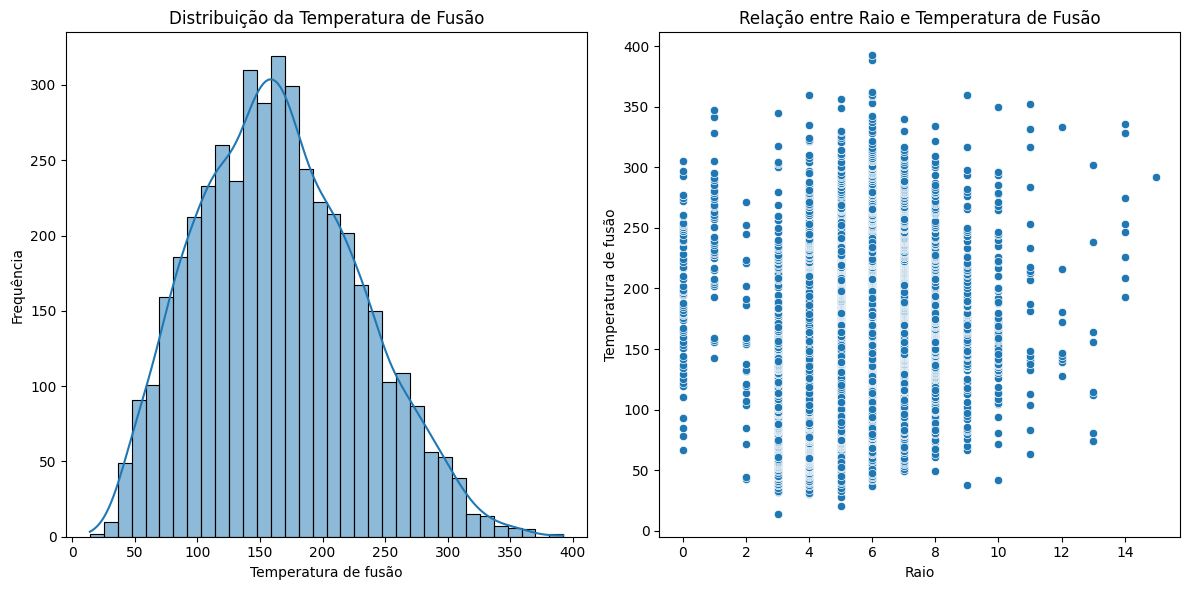

[10:18:12] Explicit valence for atom # 18 C, 5, is greater than permitted
[10:18:12] Explicit valence for atom # 5 C, 5, is greater than permitted
[10:18:12] Explicit valence for atom # 18 C, 5, is greater than permitted
[10:18:13] Explicit valence for atom # 2 C, 5, is greater than permitted
[10:18:13] Explicit valence for atom # 2 C, 5, is greater than permitted
[10:18:13] Explicit valence for atom # 3 C, 5, is greater than permitted
[10:18:13] Explicit valence for atom # 8 C, 5, is greater than permitted
[10:18:13] Explicit valence for atom # 5 C, 5, is greater than permitted
[10:18:13] Explicit valence for atom # 18 C, 5, is greater than permitted
[10:18:13] Explicit valence for atom # 12 C, 5, is greater than permitted
[10:18:13] Explicit valence for atom # 3 C, 5, is greater than permitted
[10:18:13] Explicit valence for atom # 20 C, 5, is greater than permitted
[10:18:13] Explicit valence for atom # 12 C, 5, is greater than permitted
[10:18:13] Explicit valence for atom # 18 C, 


Avaliação do modelo:
MSE (Mean Squared Error): 4129.295243523924
MAE (Mean Absolute Error): 50.05769627085975
R2 Score (Coefficient of Determination): 0.024518222697652803

Imagem da melhor molécula:


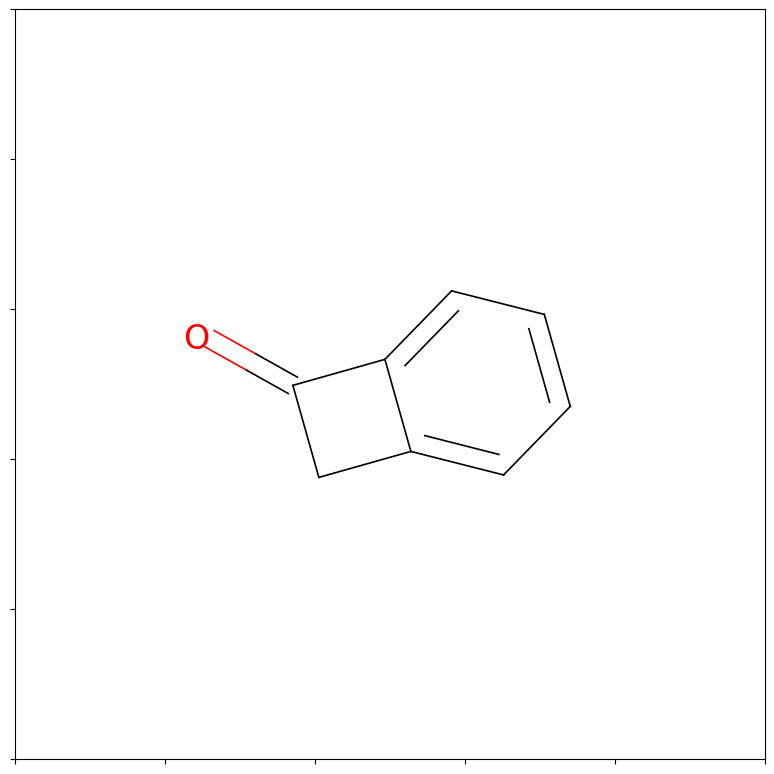

In [ ]:
# Carregar o arquivo de dados
data = pd.read_csv('4137_185_92_DataSetMTPSMIDescr.txt', sep='\t')

# Análise exploratória dos dados
print("Primeiras linhas do dataset:")
print(data.head())  # Visualizar as primeiras linhas do dataset

print("\nResumo estatístico dos dados:")
print(data.describe())  # Resumo estatístico dos dados

# Visualização dos dados
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['$Field_2'], kde=True)
plt.xlabel('Temperatura de fusão')
plt.ylabel('Frequência')
plt.title('Distribuição da Temperatura de Fusão')

plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='radius', y='$Field_2')
plt.xlabel('Raio')
plt.ylabel('Temperatura de fusão')
plt.title('Relação entre Raio e Temperatura de Fusão')
plt.tight_layout()
plt.show()

# Calcular descritores moleculares
data['Descriptors'] = data['$Field_1'].apply(lambda x: Chem.MolFromSmiles(x) if isinstance(x, str) else None)
data = data.dropna(subset=['Descriptors'])  # Remover linhas com valores ausentes
data['NumAtoms'] = data['Descriptors'].apply(lambda x: x.GetNumAtoms())
data['MolWeight'] = data['Descriptors'].apply(lambda x: Descriptors.MolWt(x))

# Dividir os dados em conjunto de treinamento e teste
X = data[['NumAtoms', 'MolWeight']]  # Descritores moleculares
y = data['$Field_2']  # Temperatura de fusão (melting point)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo preditivo
# Nota: você pode ajustar os parâmetros do RandomForestRegressor de acordo com suas necessidades
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Avaliação do modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('\nAvaliação do modelo:')
print('MSE (Mean Squared Error):', mse)
print('MAE (Mean Absolute Error):', mae)
print('R2 Score (Coefficient of Determination):', r2)

# Obter o índice da amostra com o menor MSE
best_sample_index = mse.argmin()

# Gerar a imagem da molécula com o melhor desempenho
best_smiles = data.loc[best_sample_index, '$Field_1']
best_molecule = Chem.MolFromSmiles(best_smiles)

# Exibir mensagem indicando que é a imagem da melhor molécula
print('\nImagem da melhor molécula:')

# Exibir a imagem da molécula
Draw.MolToMPL(best_molecule)
plt.show()


    Análise exploratória dos dados:
        print(data.head()): Essa linha exibe as primeiras linhas do dataset, permitindo visualizar uma amostra dos dados.
        print(data.describe()): Essa linha fornece um resumo estatístico dos dados, incluindo contagem, média, desvio padrão, valores mínimo e máximo, e quartis. Isso ajuda a entender a distribuição e as características dos dados.

    Modelo preditivo da temperatura de fusão:
        X = data[['NumAtoms', 'MolWeight']]: Aqui, selecionamos as colunas 'NumAtoms' e 'MolWeight' como os descritores moleculares para usar como entrada do modelo.
        y = data['$Field_2']: Definimos a coluna '$Field_2' (temperatura de fusão) como o valor de saída que queremos prever.
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42): Dividimos os dados em conjuntos de treinamento e teste, sendo 80% dos dados para treinamento e 20% para teste.
        model = RandomForestRegressor(n_estimators=100, random_state=42): Criamos um modelo de regressão utilizando o algoritmo Random Forest com 100 estimadores.
        model.fit(X_train, y_train): Treinamos o modelo utilizando os dados de treinamento.
        y_pred = model.predict(X_test): Realizamos a previsão da temperatura de fusão para os dados de teste.
        mse = mean_squared_error(y_test, y_pred): Calculamos o erro quadrático médio (MSE) entre os valores reais (y_test) e as previsões (y_pred).
        mae = mean_absolute_error(y_test, y_pred): Calculamos o erro médio absoluto (MAE) entre os valores reais e as previsões.
        r2 = r2_score(y_test, y_pred): Calculamos o coeficiente de determinação (R2) que indica a proporção da variância dos dados que é capturada pelo modelo.
        print('MSE:', mse), print('MAE:', mae), print('R2 Score:', r2): Imprimimos os valores das métricas de desempenho do modelo.

    Discussão das métricas de desempenho e aplicabilidade do modelo:
        O MSE (Mean Squared Error) é uma métrica que mede a média dos erros ao quadrado entre os valores reais e as previsões. Quanto menor o valor do MSE, melhor é o desempenho do modelo.
        O MAE (Mean Absolute Error) é uma métrica que mede a média dos erros absolutos entre os valores reais e as previsões. Assim como o MSE, quanto menor o valor do MAE, melhor é o desempenho do modelo.
        O R2 Score (Coefficient of Determination) é uma métrica que indica a proporção da variância dos dados que é explicada pelo modelo. Um valor próximo a 1 indica um bom ajuste do modelo aos dados, ou seja, o modelo é capaz de explicar uma grande parte da variabilidade dos dados observados.
        Essas métricas de desempenho são úteis para avaliar a qualidade das previsões feitas pelo modelo de regressão. No caso específico desse código, elas são calculadas para o modelo de Random Forest que foi treinado para prever a temperatura de fusão com base nos descritores moleculares 'NumAtoms' e 'MolWeight'. Ao avaliar as métricas de desempenho, você pode ter uma ideia de quão bem o modelo está se ajustando aos dados e fazer uma análise da sua aplicabilidade em predições futuras.


  O erro "Explicit valence for atom # X C, 5, is greater than permitted" ocorre quando o número de ligações explícitas (valência) de um átomo de carbono excede o número máximo permitido. O átomo de carbono normalmente forma 4 ligações, mas nesses casos, a valência é definida como 5.

  Isso geralmente ocorre quando a estrutura química fornecida viola as regras de valência. As regras de valência determinam o número máximo de ligações que um átomo pode fazer com outros átomos com base em sua configuração eletrônica. A valência do carbono é 4 porque possui 4 elétrons de valência.

  Existem várias razões pelas quais esse erro pode ocorrer. Alguns exemplos incluem:

    Ligações duplicadas: Pode haver ligações duplicadas entre átomos de carbono, o que excede o número máximo de ligações permitidas.

    Carga formal incorreta: A estrutura química pode ter cargas formais incorretas em alguns átomos, o que resulta em valências maiores do que o permitido.

    Estrutura inválida: A estrutura química fornecida pode ser inválida ou impossível de existir devido a sobreposição de orbitais ou outras restrições estéricas.

  Para corrigir esse problema, é necessário revisar a estrutura química e corrigir as valências dos átomos de carbono para que estejam de acordo com as regras de valência. Isso pode envolver ajustar as ligações, adicionar ou remover átomos ou redefinir as cargas formais dos átomos, dependendo da natureza específica do erro.